In [163]:
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("clean_steam_data.csv",dtype={'Name': 'str'}, low_memory=False)


In [164]:
# data.columns

In [165]:
sample_size = 50  # Adjust this based on your requirements
# Randomly sample the data
# data['Name'] = data['Name'].astype(str)

# print(names.head())
data_sample  = data.sample(n=sample_size, random_state=35)  # Adjust random_state for reproducibility
names = data_sample['Name'].tolist()
data_sample.drop("Name", axis=1, inplace=True)
# for index, row in data_sample.iterrows():
#     print(row['Name'])
# data_sample['Name'] = names[names['AppID'] == data_sample['AppID']]['Name']

C:\Users\liamc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27934 (\N{CJK UNIFIED IDEOGRAPH-6D1E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\liamc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31348 (\N{CJK UNIFIED IDEOGRAPH-7A74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\liamc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25506 (\N{CJK UNIFIED IDEOGRAPH-63A2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\liamc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-

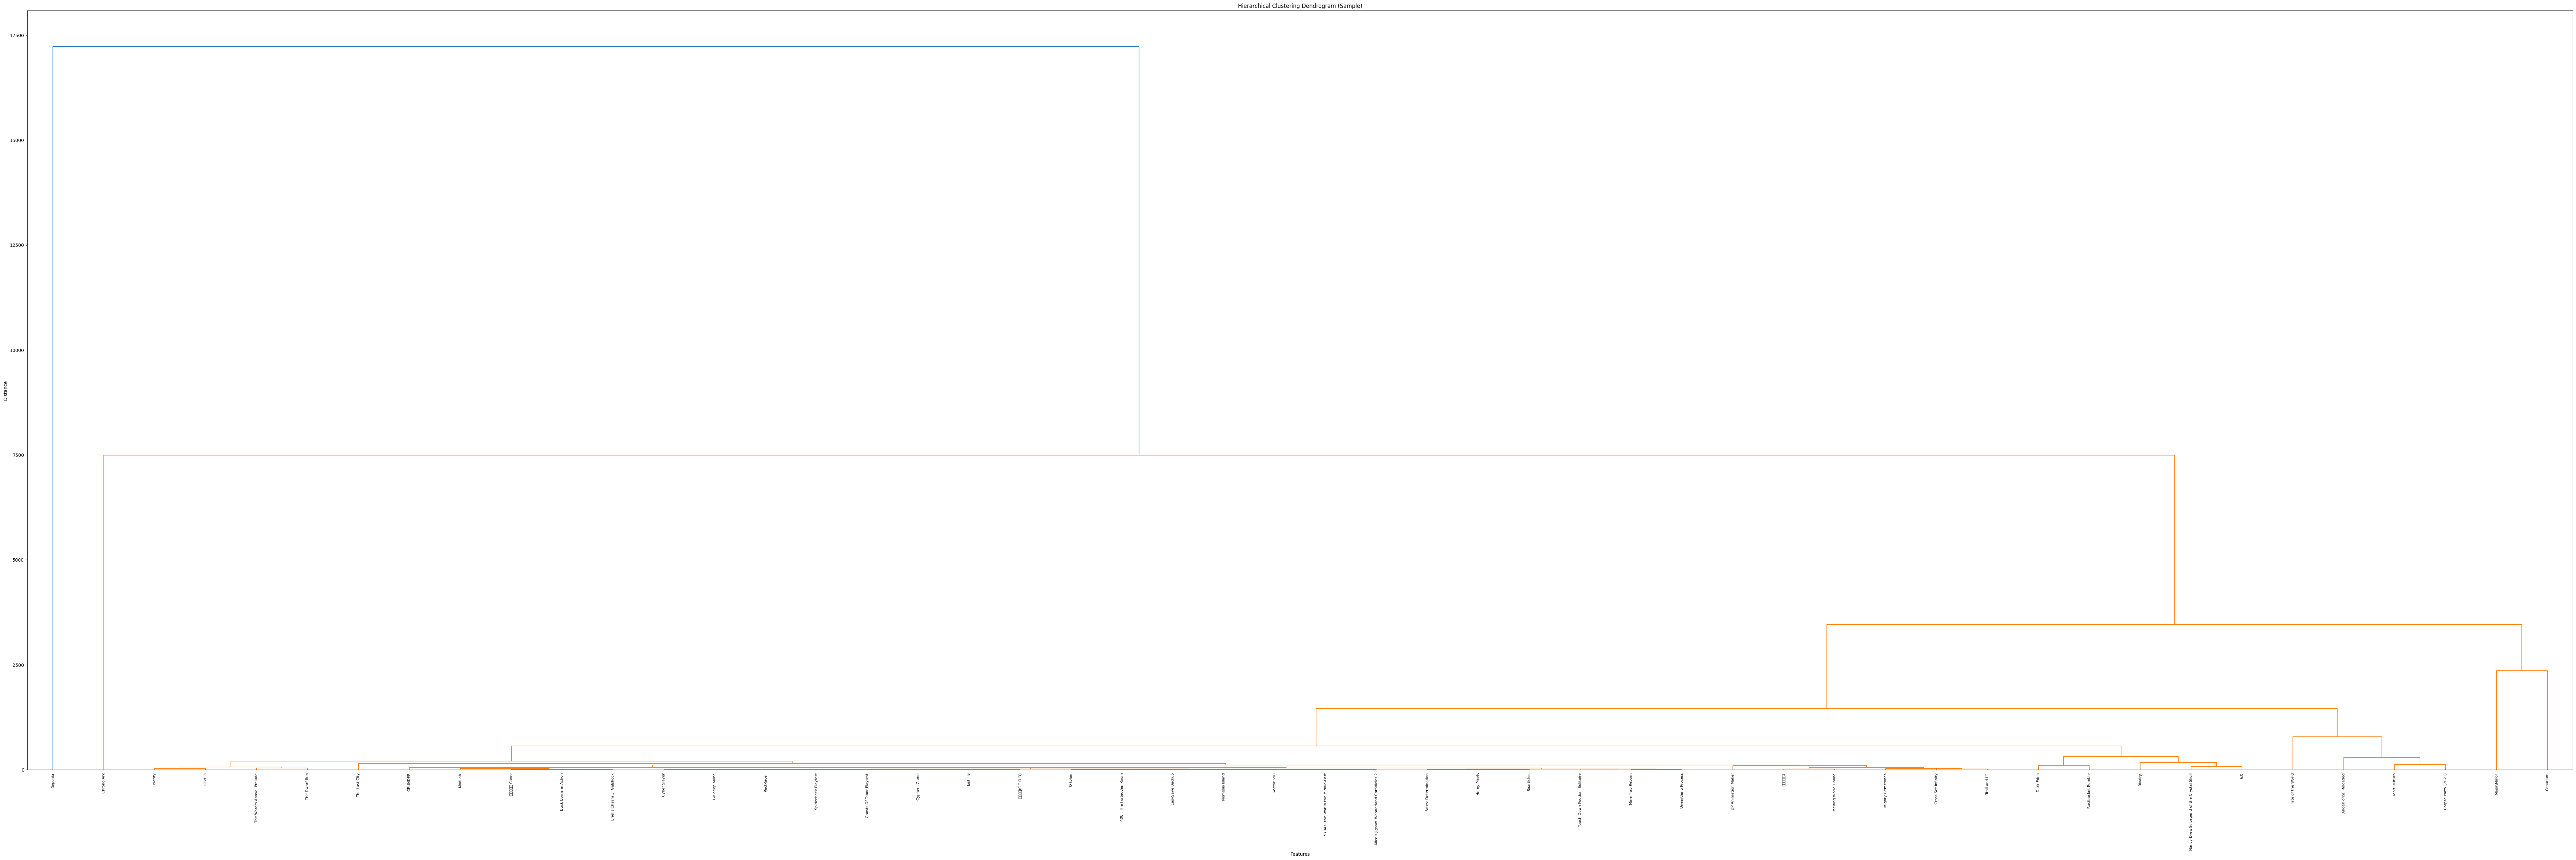

In [166]:
linkage_data = linkage(data_sample, method='ward', metric='euclidean')
# print(data_sample.shape)
# print(linkage_data.shape)
# Visualize the dendrogram
# names = data_sample['names'].tolist()
plt.rc('axes', unicode_minus=False)
plt.figure(figsize=(100, 30))
dendrogram(linkage_data, labels=names, orientation='top')
plt.title('Hierarchical Clustering Dendrogram (Sample)')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.show()

C:\Users\liamc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\liamc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\liamc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

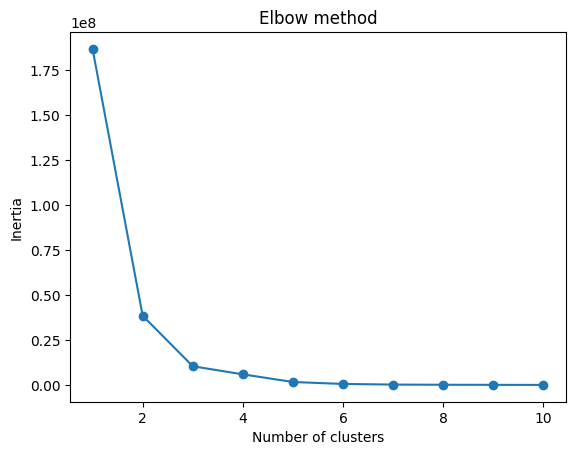

In [167]:
from sklearn.cluster import KMeans
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data_sample)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [168]:
from sklearn.decomposition import PCA


y = data_sample['Recommendations'].copy()
# print(y.head())

data_sample.drop("Recommendations", axis=1, inplace=True)
X = data_sample.copy()
# print(X.head())

pca_steam = PCA(n_components=3)
principalComponents_steam = pca_steam.fit_transform(data_sample)

890        0.0
64396      0.0
40928      0.0
36816    126.0
28050    260.0
Name: Recommendations, dtype: float64
       Required age  Price  DLC count  Positive  Negative  Achievements  \
890             0.0   0.00        0.0       0.0       0.0           0.0   
64396           0.0   0.00        0.0       0.0       0.0           0.0   
40928           0.0   5.99        0.0       1.0       1.0           0.0   
36816           0.0   6.99        0.0     120.0      12.0           0.0   
28050           0.0   9.99        0.0     326.0      32.0          64.0   

       Average playtime forever  Median playtime forever  \
890                         0.0                      0.0   
64396                       0.0                      0.0   
40928                       0.0                      0.0   
36816                       5.0                      5.0   
28050                     130.0                    199.0   

       Category_Captions available  Category_Co-op  ...  Website_exists  \


In [169]:
principalComponents_steam = np.array(principalComponents_steam)

principal_steam_Df = pd.DataFrame(data = principalComponents_steam
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
print(principal_steam_Df.describe())

       principal component 1  principal component 2  principal component 3
count           5.000000e+01           5.000000e+01           5.000000e+01
mean           -1.364242e-14          -9.094947e-15           6.572520e-15
std             1.426977e+03           3.790150e+02           3.916517e+01
min            -3.706766e+02          -7.206959e+02          -9.590081e+01
25%            -3.695256e+02          -8.184484e+01          -1.289750e+01
50%            -3.561168e+02          -7.764459e+01          -1.135871e+01
75%            -2.523047e+02          -7.739477e+01          -3.740101e+00
max             9.052503e+03           1.974197e+03           1.661060e+02


In [170]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

# Calculate metrics (optional)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

Mean Squared Error: 62408.41
Mean Absolute Error: 121.18
